In [405]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.signal as signal

# This notebook tests applying different filters to the data obtained in Firth road test 1

## Audi A1 Driving at 20km/h

### Dataset 1

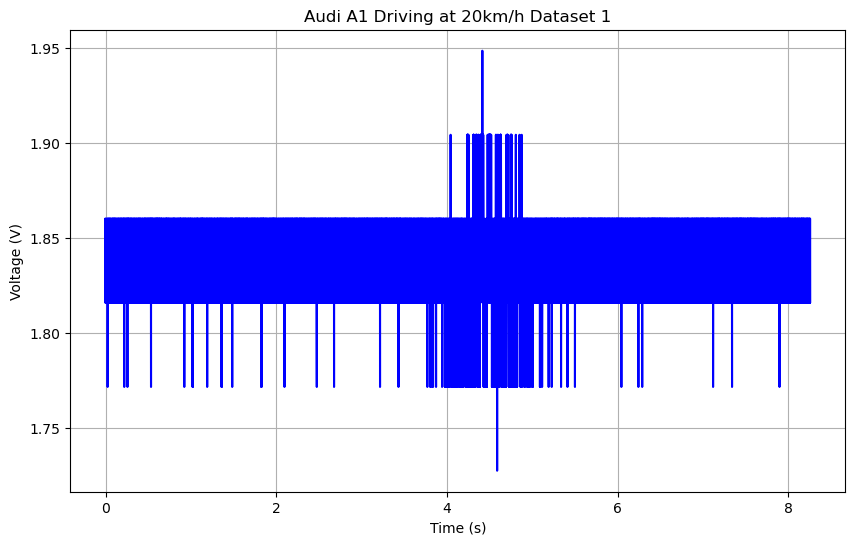

In [406]:
# Initialize empty lists to store time and voltage data
time_data = []
voltage_data = []

# Read data from the text file
with open('40ksps/20km_h.txt', 'r') as file:
    next(file)  # Skip the header line
    next(file)
    for line in file:
        # Split each line into columns using whitespace as the delimiter
        columns = line.strip().split()
        if len(columns) == 2:
            time_data.append(float(columns[0]))
            voltage_data.append(float(columns[1]))

voltage_data = np.array(voltage_data) #converting voltage_data into a numpy array


# Create the plot
plt.figure(figsize=(10, 6))  # Optional: Set the figure size
plt.plot(time_data, voltage_data, color='b')
plt.xlabel('Time (s)')
plt.ylabel('Voltage (V)')
plt.title('Audi A1 Driving at 20km/h Dataset 1')
plt.grid(True)


# Show the plot
plt.show()


### Applying a moving average filter to the above data

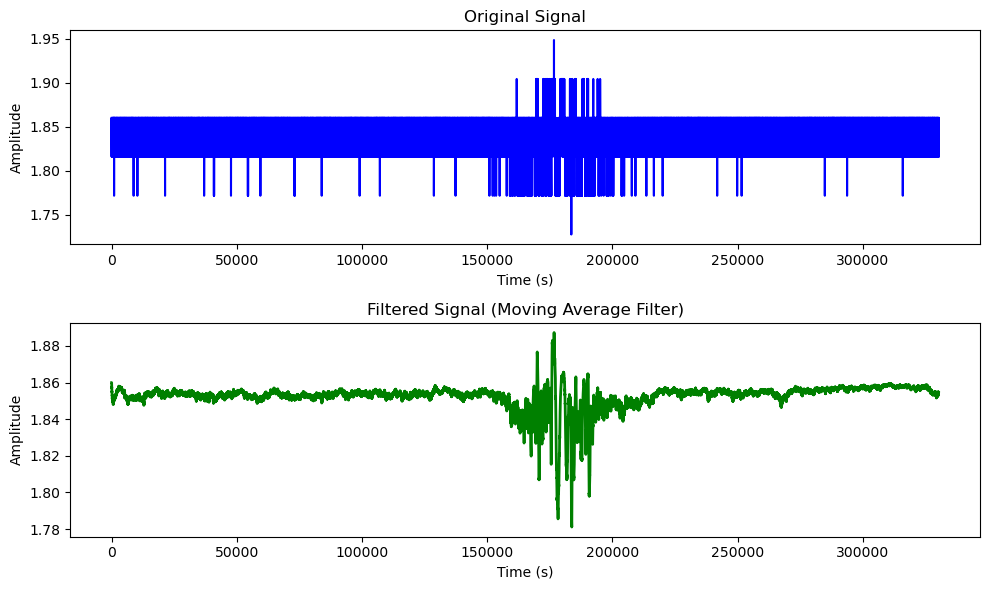

In [407]:
class LowpassFilter:
    def __init__(self, alpha):
        """
        Initialize the lowpass filter.

        Args:
        alpha (float): Smoothing factor (0 < alpha < 1). A smaller alpha gives stronger smoothing.
        """
        self.alpha = alpha
        self.filtered_value = None

    def update(self, new_value):
        """
        Update the filter with a new value.

        Args:
        new_value (float): New input value.

        Returns:
        float: Filtered output.
        """
        if self.filtered_value is None:
            self.filtered_value = new_value
        else:
            self.filtered_value = self.alpha * new_value + (1 - self.alpha) * self.filtered_value
        return self.filtered_value

# Example usage
alpha = 0.005  # Smoothing factor (adjust as needed, lower values provide stronger smoothing)
lowpass_filter = LowpassFilter(alpha)

# Apply the lowpass filter to the input data
filtered_data = [lowpass_filter.update(value) for value in voltage_data]
filtered_data = np.array(filtered_data)
# Now, filtered_data contains the filtered values.


# Plot the original and filtered signals
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(voltage_data, 'b-', label='Original Signal')
plt.title('Original Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.subplot(2, 1, 2)
plt.plot(filtered_data, 'g-', linewidth=2, label='Filtered Signal')
plt.title('Filtered Signal (Moving Average Filter)')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()


### Downsampling the above filtered data from 40ksps to 8ksps

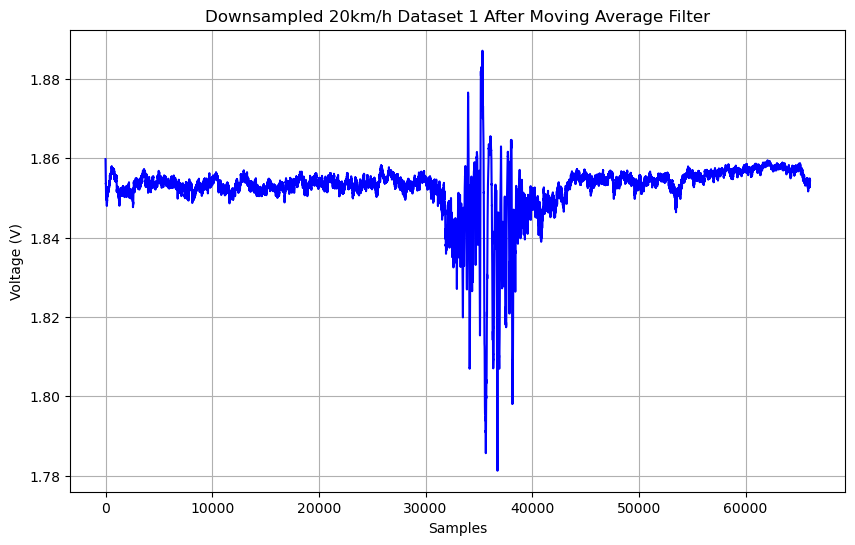

In [408]:
# Original data at 20 ks/s
original_data = filtered_data

# Downsampling factor (20 ks/s to 1 ks/s)
downsampling_factor = 5

# Calculate the length of the downsampled array
downsampled_length = len(original_data) // downsampling_factor

# Create an empty array for the downsampled data
downsampled_data = np.empty(downsampled_length)

# Perform downsampling by averaging
for i in range(downsampled_length):
    start_index = i * downsampling_factor
    end_index = start_index + downsampling_factor
    downsampled_data[i] = np.mean(original_data[start_index:end_index])


#downsampled_data = abs(downsampled_data - 2.5)
#downsampled_data = downsampled_data[0:1000]

# Now, downsampled_data contains the downsampled array at 1 ks/s
# Create the plot
plt.figure(figsize=(10, 6))  # Optional: Set the figure size
plt.plot(downsampled_data, color='b')
plt.xlabel('Samples')
plt.ylabel('Voltage (V)')
plt.title('Downsampled 20km/h Dataset 1 After Moving Average Filter')
plt.grid(True)

### Isolating the target

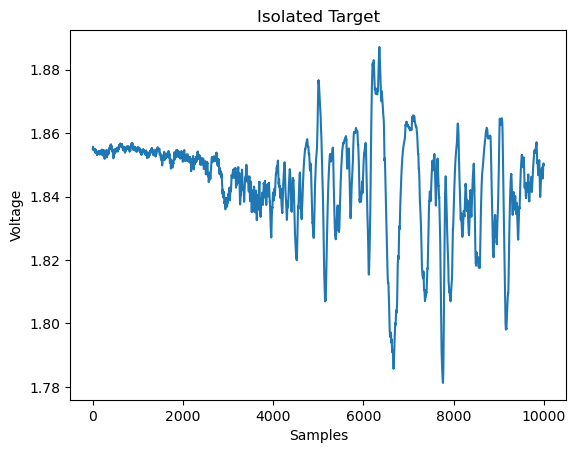

In [409]:
target = np.array(1000)



for i in range(len(downsampled_data)):
    if downsampled_data[i] > 1.875:
        target = downsampled_data[i-5000:5000+i]
        
        break
    


plt.plot(target)
plt.title('Isolated Target')
plt.xlabel('Samples')
plt.ylabel('Voltage')
plt.show()  

### DFT of target data

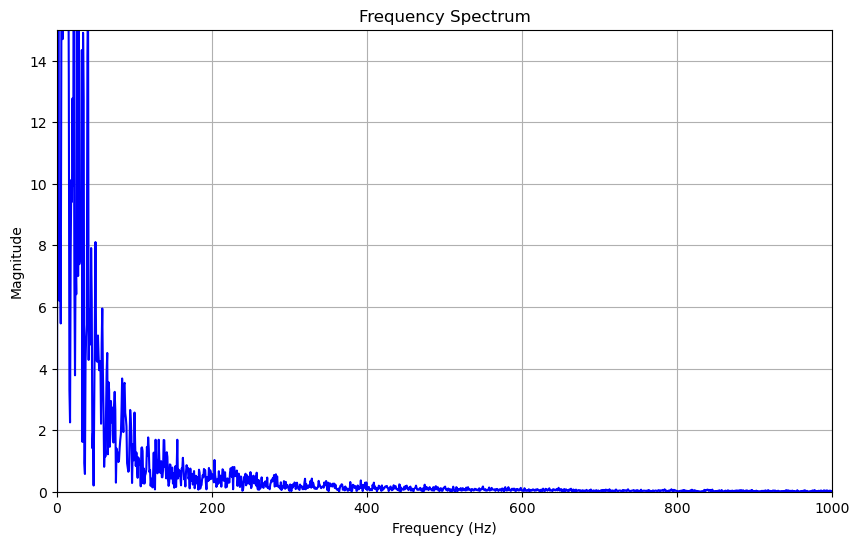

In [410]:
# Sampling frequency (inverse of the time step)
sampling_frequency = 8000

# Perform the FFT
fft_result = np.fft.fft(target)
fft_freqs = np.fft.fftfreq(len(target), 1 / sampling_frequency)

# Calculate the magnitude of the FFT result
fft_magnitude = np.abs(fft_result)
fft_magnitude[0] = 0
# Plot the frequency spectrum
plt.figure(figsize=(10, 6))  # Optional: Set the figure size
plt.plot(fft_freqs[:len(fft_freqs) // 2], fft_magnitude[:len(fft_magnitude) // 2], color='b')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.ylim(0,15)
plt.xlim(0,1000)
plt.title('Frequency Spectrum')
plt.grid(True)

# Show the plot
plt.show()

## Audi A1 Moving at 40km/h 

### Dataset 1

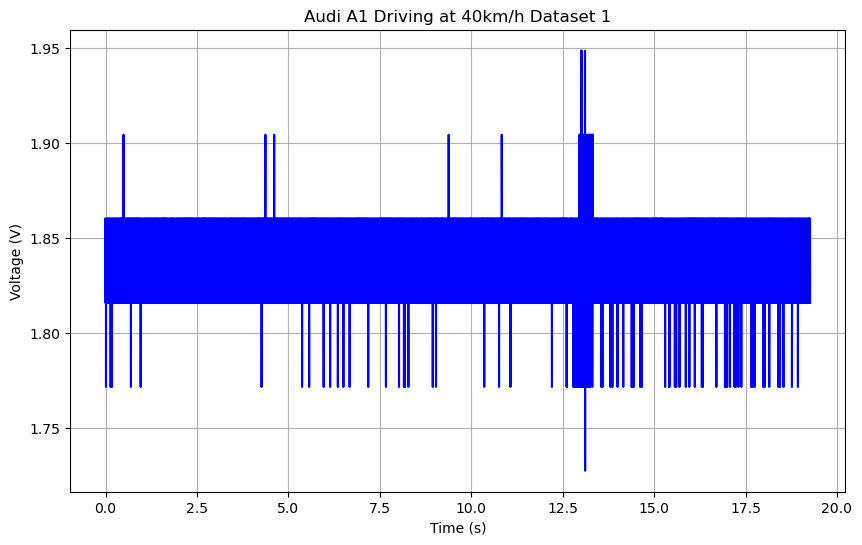

In [411]:
# Initialize empty lists to store time and voltage data
time_data = []
voltage_data = []

# Read data from the text file
with open('40ksps/40km_h.txt', 'r') as file:
    next(file)  # Skip the header line
    next(file)
    for line in file:
        # Split each line into columns using whitespace as the delimiter
        columns = line.strip().split()
        if len(columns) == 2:
            time_data.append(float(columns[0]))
            voltage_data.append(float(columns[1]))

voltage_data = np.array(voltage_data) #converting voltage_data into a numpy array


# Create the plot
plt.figure(figsize=(10, 6))  # Optional: Set the figure size
plt.plot(time_data, voltage_data, color='b')
plt.xlabel('Time (s)')
plt.ylabel('Voltage (V)')
plt.title('Audi A1 Driving at 40km/h Dataset 1')
plt.grid(True)


# Show the plot
plt.show()


### Applying a moving average filter

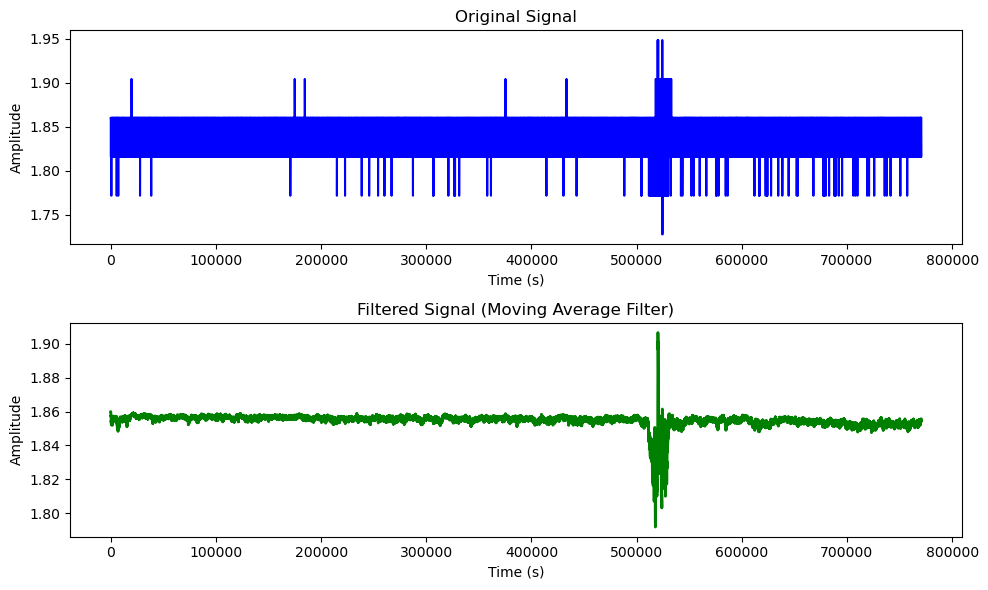

In [412]:
class LowpassFilter:
    def __init__(self, alpha):
        """
        Initialize the lowpass filter.

        Args:
        alpha (float): Smoothing factor (0 < alpha < 1). A smaller alpha gives stronger smoothing.
        """
        self.alpha = alpha
        self.filtered_value = None

    def update(self, new_value):
        """
        Update the filter with a new value.

        Args:
        new_value (float): New input value.

        Returns:
        float: Filtered output.
        """
        if self.filtered_value is None:
            self.filtered_value = new_value
        else:
            self.filtered_value = self.alpha * new_value + (1 - self.alpha) * self.filtered_value
        return self.filtered_value

# Example usage
alpha = 0.005  # Smoothing factor (adjust as needed, lower values provide stronger smoothing)
lowpass_filter = LowpassFilter(alpha)

# Apply the lowpass filter to the input data
filtered_data = [lowpass_filter.update(value) for value in voltage_data]
filtered_data = np.array(filtered_data)
# Now, filtered_data contains the filtered values.


# Plot the original and filtered signals
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(voltage_data, 'b-', label='Original Signal')
plt.title('Original Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.subplot(2, 1, 2)
plt.plot(filtered_data, 'g-', linewidth=2, label='Filtered Signal')
plt.title('Filtered Signal (Moving Average Filter)')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()


### Downsampling the data from 40ksps to 8ksps

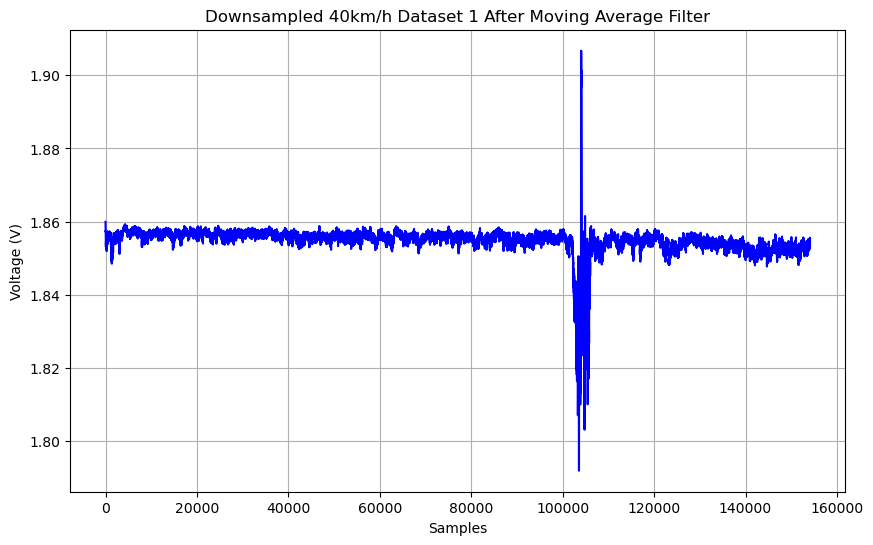

In [413]:
# Original data at 20 ks/s
original_data = filtered_data

# Downsampling factor (20 ks/s to 1 ks/s)
downsampling_factor = 5

# Calculate the length of the downsampled array
downsampled_length = len(original_data) // downsampling_factor

# Create an empty array for the downsampled data
downsampled_data = np.empty(downsampled_length)

# Perform downsampling by averaging
for i in range(downsampled_length):
    start_index = i * downsampling_factor
    end_index = start_index + downsampling_factor
    downsampled_data[i] = np.mean(original_data[start_index:end_index])


#downsampled_data = abs(downsampled_data - 2.5)
#downsampled_data = downsampled_data[0:1000]

# Now, downsampled_data contains the downsampled array at 1 ks/s
# Create the plot
plt.figure(figsize=(10, 6))  # Optional: Set the figure size
plt.plot(downsampled_data, color='b')
plt.xlabel('Samples')
plt.ylabel('Voltage (V)')
plt.title('Downsampled 40km/h Dataset 1 After Moving Average Filter')
plt.grid(True)

### Isolating the target

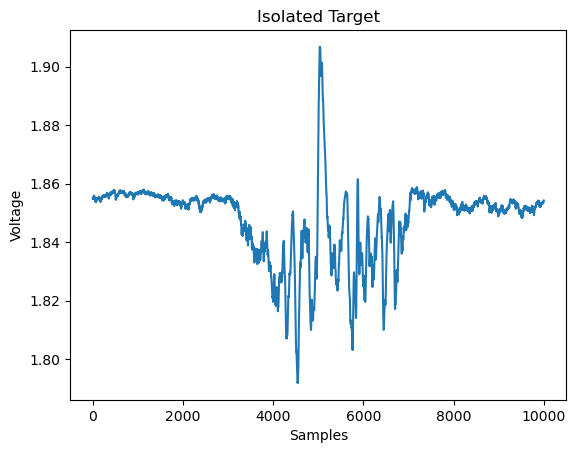

In [414]:
target = np.array(1000)



for i in range(len(downsampled_data)):
    if downsampled_data[i] > 1.875:
        target = downsampled_data[i-5000:5000+i]
        
        break
    


plt.plot(target)
plt.title('Isolated Target')
plt.xlabel('Samples')
plt.ylabel('Voltage')
plt.show()  

### DFT of target data

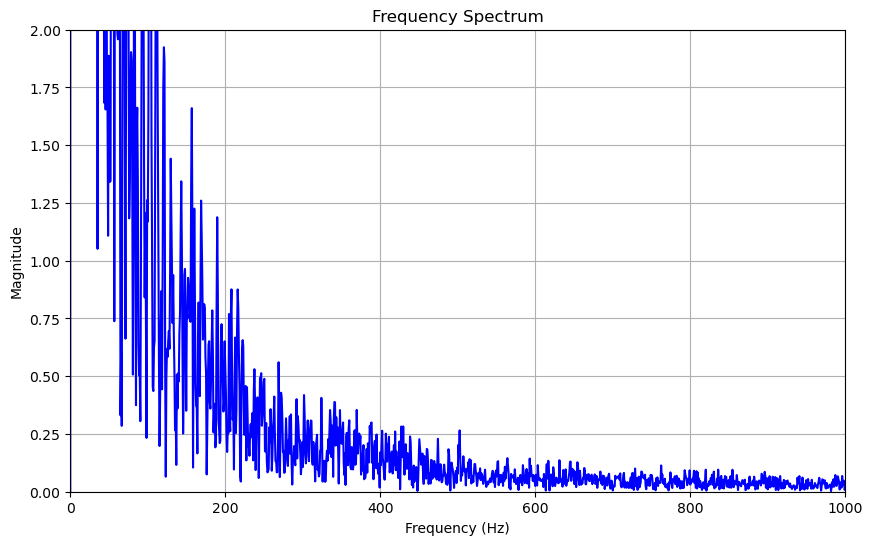

In [415]:
# Sampling frequency (inverse of the time step)
sampling_frequency = 8000

# Perform the FFT
fft_result = np.fft.fft(target)
fft_freqs = np.fft.fftfreq(len(target), 1 / sampling_frequency)

# Calculate the magnitude of the FFT result
fft_magnitude = np.abs(fft_result)
fft_magnitude[0] = 0
# Plot the frequency spectrum
plt.figure(figsize=(10, 6))  # Optional: Set the figure size
plt.plot(fft_freqs[:len(fft_freqs) // 2], fft_magnitude[:len(fft_magnitude) // 2], color='b')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.ylim(0,2)
plt.xlim(0,1000)
plt.title('Frequency Spectrum')
plt.grid(True)

# Show the plot
plt.show()

# Trying the same process but islolating the target before downsampling and filtering

### Audi A1 Moving at 20km/h 
### Dataset 1

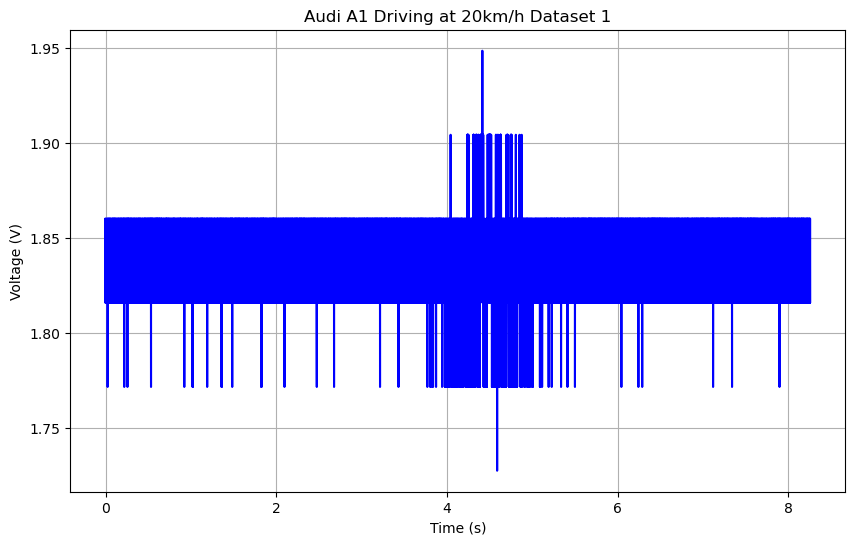

In [416]:
# Initialize empty lists to store time and voltage data
time_data = []
voltage_data = []

# Read data from the text file
with open('40ksps/20km_h.txt', 'r') as file:
    next(file)  # Skip the header line
    next(file)
    for line in file:
        # Split each line into columns using whitespace as the delimiter
        columns = line.strip().split()
        if len(columns) == 2:
            time_data.append(float(columns[0]))
            voltage_data.append(float(columns[1]))

voltage_data = np.array(voltage_data) #converting voltage_data into a numpy array


# Create the plot
plt.figure(figsize=(10, 6))  # Optional: Set the figure size
plt.plot(time_data, voltage_data, color='b')
plt.xlabel('Time (s)')
plt.ylabel('Voltage (V)')
plt.title('Audi A1 Driving at 20km/h Dataset 1')
plt.grid(True)


# Show the plot
plt.show()


### Isolating the target

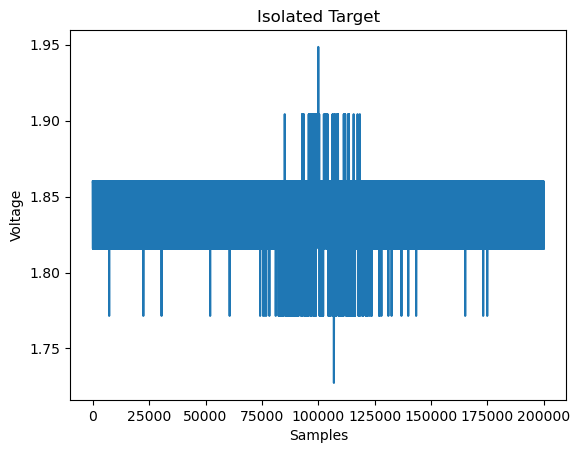

In [417]:
for i in range(len(voltage_data)):
    if voltage_data[i] > 1.93:
        target = voltage_data[i-100000:100000+i]
        
        break
    


plt.plot(target)
plt.title('Isolated Target')
plt.xlabel('Samples')
plt.ylabel('Voltage')
plt.show()  

### Applying exponential moving average filter to the isolated target

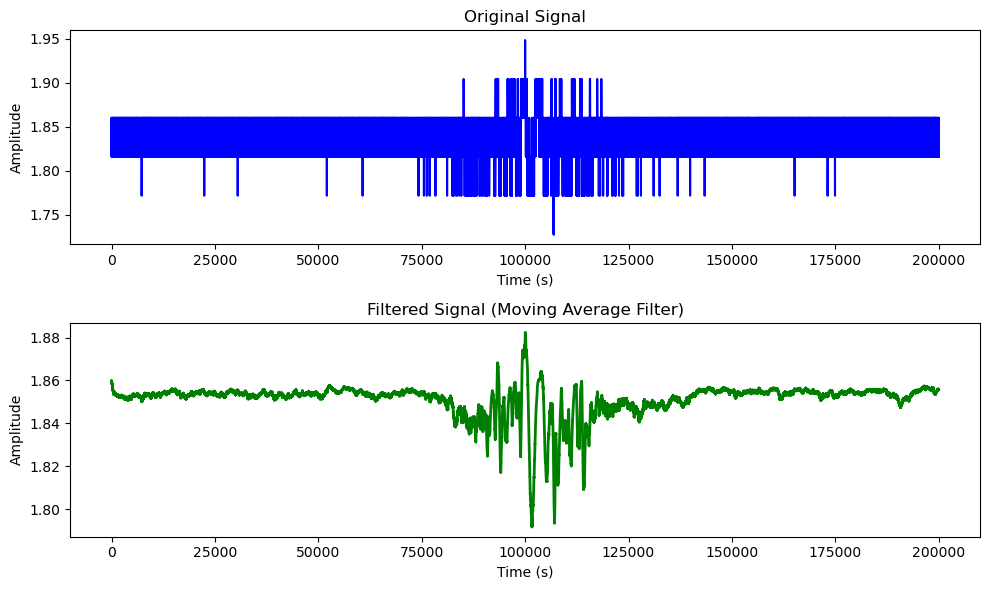

In [418]:
class LowpassFilter:
    def __init__(self, alpha):
        """
        Initialize the lowpass filter.

        Args:
        alpha (float): Smoothing factor (0 < alpha < 1). A smaller alpha gives stronger smoothing.
        """
        self.alpha = alpha
        self.filtered_value = None

    def update(self, new_value):
        """
        Update the filter with a new value.

        Args:
        new_value (float): New input value.

        Returns:
        float: Filtered output.
        """
        if self.filtered_value is None:
            self.filtered_value = new_value
        else:
            self.filtered_value = self.alpha * new_value + (1 - self.alpha) * self.filtered_value
        return self.filtered_value

# Example usage
alpha = 0.003  # Smoothing factor (adjust as needed, lower values provide stronger smoothing)
lowpass_filter = LowpassFilter(alpha)

# Apply the lowpass filter to the input data
filtered_data = [lowpass_filter.update(value) for value in target]
filtered_data = np.array(filtered_data)
# Now, filtered_data contains the filtered values.


# Plot the original and filtered signals
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(target, 'b-', label='Original Signal')
plt.title('Original Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.subplot(2, 1, 2)
plt.plot(filtered_data, 'g-', linewidth=2, label='Filtered Signal')
plt.title('Filtered Signal (Moving Average Filter)')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()


### Taking DFT of Filtered Data

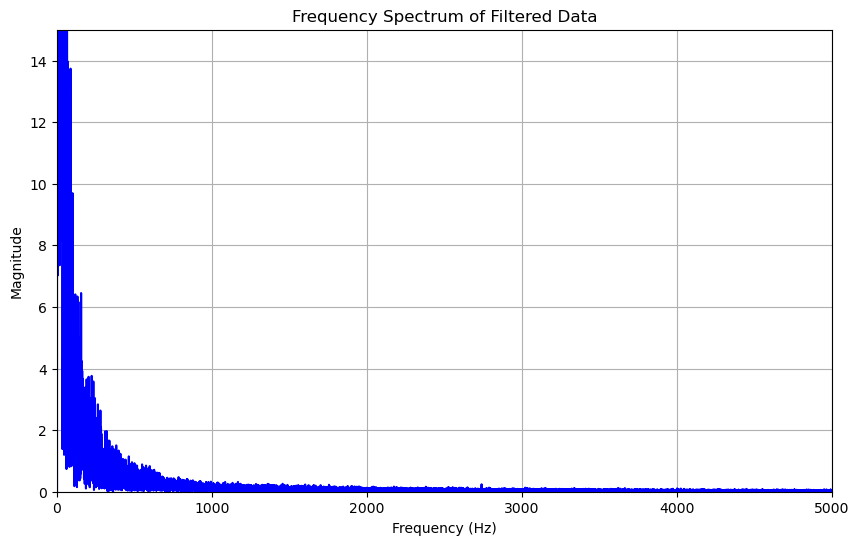

In [419]:
# Sampling frequency (inverse of the time step)
sampling_frequency = 40000

# Perform the FFT
fft_result = np.fft.fft(filtered_data)
fft_freqs = np.fft.fftfreq(len(filtered_data), 1 / sampling_frequency)

# Calculate the magnitude of the FFT result
fft_magnitude = np.abs(fft_result)
fft_magnitude[0] = 0
# Plot the frequency spectrum
plt.figure(figsize=(10, 6))  # Optional: Set the figure size
plt.plot(fft_freqs[:len(fft_freqs) // 2], fft_magnitude[:len(fft_magnitude) // 2], color='b')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.ylim(0,15)
plt.xlim(0,5000)
plt.title('Frequency Spectrum of Filtered Data')
plt.grid(True)

# Show the plot
plt.show()

### Downsampling the data

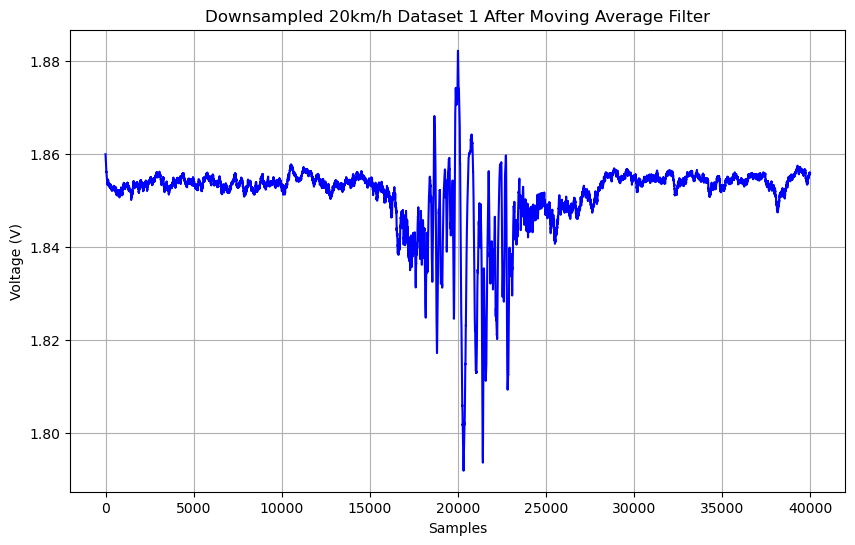

In [420]:
# Original data at 20 ks/s
original_data = filtered_data

# Downsampling factor (20 ks/s to 1 ks/s)
downsampling_factor = 5

# Calculate the length of the downsampled array
downsampled_length = len(original_data) // downsampling_factor

# Create an empty array for the downsampled data
downsampled_data = np.empty(downsampled_length)

# Perform downsampling by averaging
for i in range(downsampled_length):
    start_index = i * downsampling_factor
    end_index = start_index + downsampling_factor
    downsampled_data[i] = np.mean(original_data[start_index:end_index])


#downsampled_data = abs(downsampled_data - 2.5)
#downsampled_data = downsampled_data[0:1000]

# Now, downsampled_data contains the downsampled array at 1 ks/s
# Create the plot
plt.figure(figsize=(10, 6))  # Optional: Set the figure size
plt.plot(downsampled_data, color='b')
plt.xlabel('Samples')
plt.ylabel('Voltage (V)')
plt.title('Downsampled 20km/h Dataset 1 After Moving Average Filter')
plt.grid(True)

### Taking DFT of above data

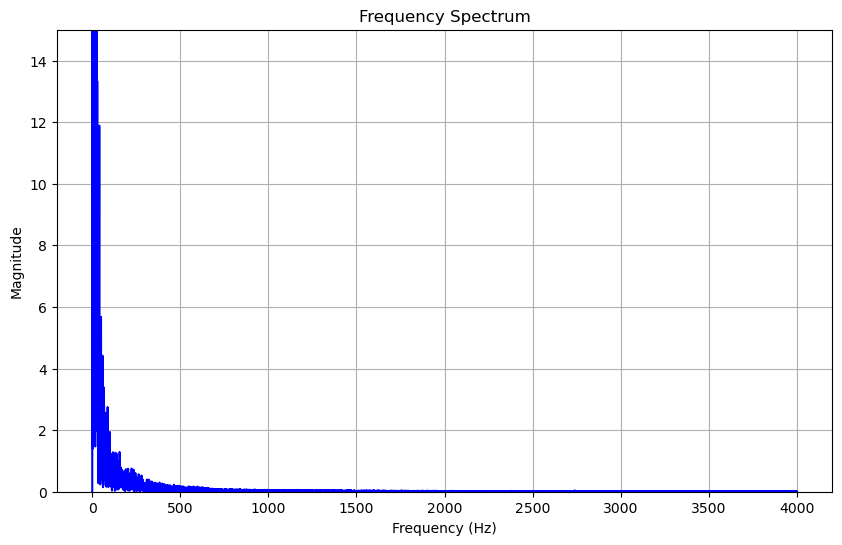

In [421]:
# Sampling frequency (inverse of the time step)
sampling_frequency = 8000

# Perform the FFT
fft_result = np.fft.fft(downsampled_data)
fft_freqs = np.fft.fftfreq(len(downsampled_data), 1 / sampling_frequency)

# Calculate the magnitude of the FFT result
fft_magnitude = np.abs(fft_result)
fft_magnitude[0] = 0
# Plot the frequency spectrum
plt.figure(figsize=(10, 6))  # Optional: Set the figure size
plt.plot(fft_freqs[:len(fft_freqs) // 2], fft_magnitude[:len(fft_magnitude) // 2], color='b')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.ylim(0,15)
#plt.xlim(0,1000)
plt.title('Frequency Spectrum')
plt.grid(True)

# Show the plot
plt.show()

### Audi A1 Driving at 40km/h 
### Dataset 1

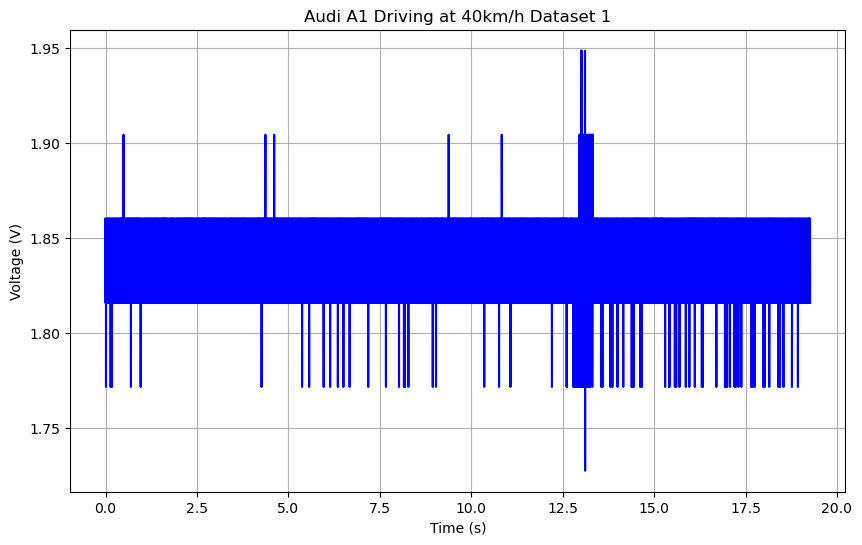

In [422]:
# Initialize empty lists to store time and voltage data
time_data = []
voltage_data = []

# Read data from the text file
with open('40ksps/40km_h.txt', 'r') as file:
    next(file)  # Skip the header line
    next(file)
    for line in file:
        # Split each line into columns using whitespace as the delimiter
        columns = line.strip().split()
        if len(columns) == 2:
            time_data.append(float(columns[0]))
            voltage_data.append(float(columns[1]))

voltage_data = np.array(voltage_data) #converting voltage_data into a numpy array


# Create the plot
plt.figure(figsize=(10, 6))  # Optional: Set the figure size
plt.plot(time_data, voltage_data, color='b')
plt.xlabel('Time (s)')
plt.ylabel('Voltage (V)')
plt.title('Audi A1 Driving at 40km/h Dataset 1')
plt.grid(True)


# Show the plot
plt.show()


### Isolating the target

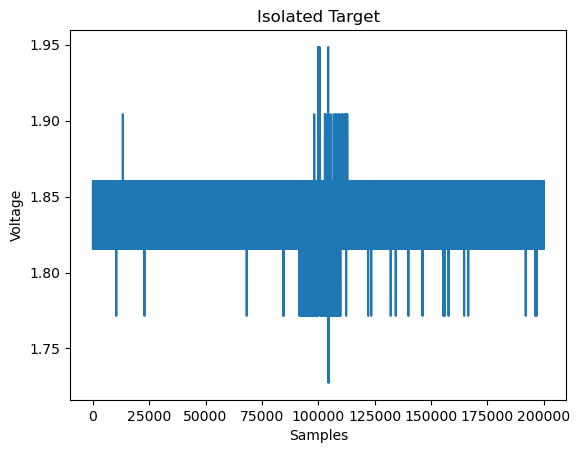

In [423]:
for i in range(len(voltage_data)):
    if voltage_data[i] > 1.93:
        target = voltage_data[i-100000:100000+i]
        
        break
    


plt.plot(target)
plt.title('Isolated Target')
plt.xlabel('Samples')
plt.ylabel('Voltage')
plt.show()  

### Applying exponetial moving average filter to the target

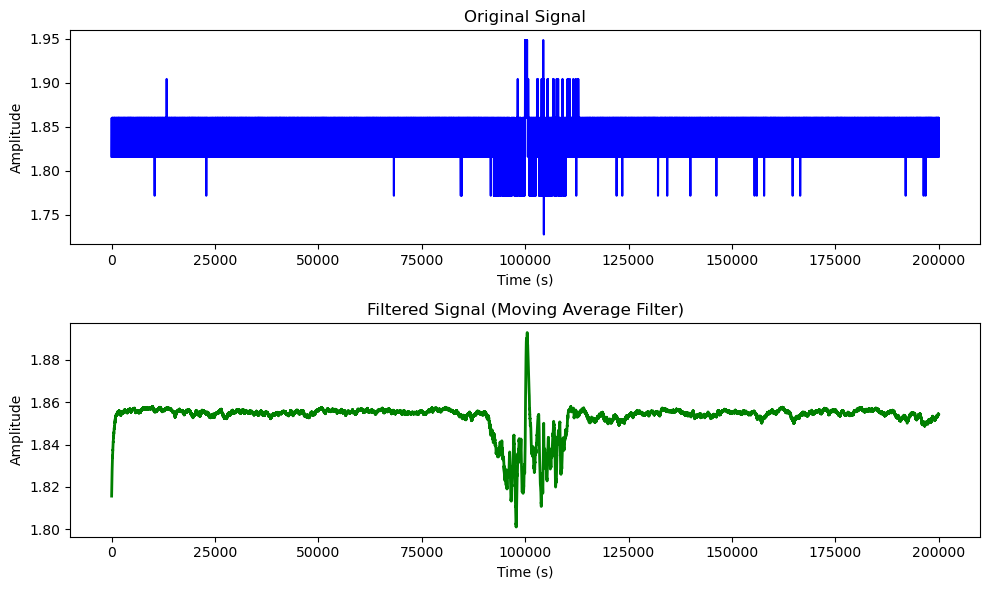

In [424]:
class LowpassFilter:
    def __init__(self, alpha):
        """
        Initialize the lowpass filter.

        Args:
        alpha (float): Smoothing factor (0 < alpha < 1). A smaller alpha gives stronger smoothing.
        """
        self.alpha = alpha
        self.filtered_value = None

    def update(self, new_value):
        """
        Update the filter with a new value.

        Args:
        new_value (float): New input value.

        Returns:
        float: Filtered output.
        """
        if self.filtered_value is None:
            self.filtered_value = new_value
        else:
            self.filtered_value = self.alpha * new_value + (1 - self.alpha) * self.filtered_value
        return self.filtered_value

# Example usage
alpha = 0.003  # Smoothing factor (adjust as needed, lower values provide stronger smoothing)
lowpass_filter = LowpassFilter(alpha)

# Apply the lowpass filter to the input data
filtered_data = [lowpass_filter.update(value) for value in target]
filtered_data = np.array(filtered_data)
# Now, filtered_data contains the filtered values.


# Plot the original and filtered signals
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(target, 'b-', label='Original Signal')
plt.title('Original Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.subplot(2, 1, 2)
plt.plot(filtered_data, 'g-', linewidth=2, label='Filtered Signal')
plt.title('Filtered Signal (Moving Average Filter)')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()


### Taking DFT of Filtered Data

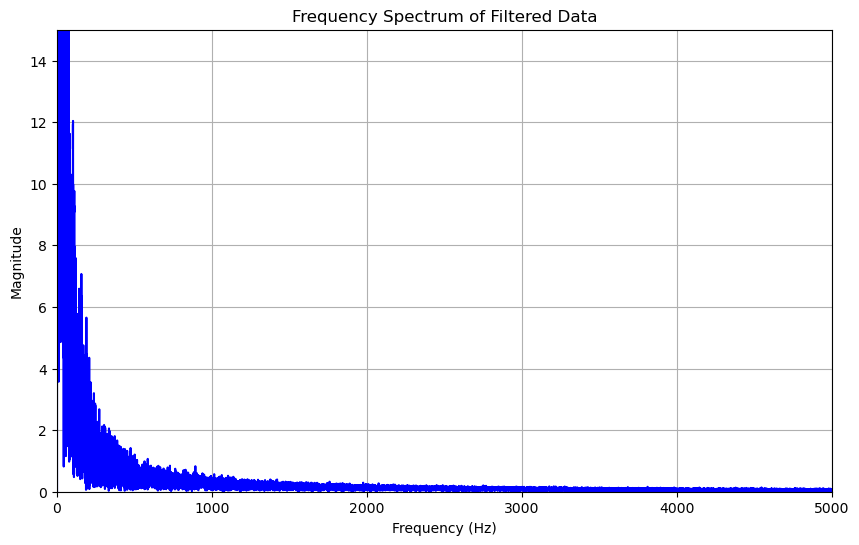

In [425]:
# Sampling frequency (inverse of the time step)
sampling_frequency = 40000

# Perform the FFT
fft_result = np.fft.fft(filtered_data)
fft_freqs = np.fft.fftfreq(len(filtered_data), 1 / sampling_frequency)

# Calculate the magnitude of the FFT result
fft_magnitude = np.abs(fft_result)
fft_magnitude[0] = 0
# Plot the frequency spectrum
plt.figure(figsize=(10, 6))  # Optional: Set the figure size
plt.plot(fft_freqs[:len(fft_freqs) // 2], fft_magnitude[:len(fft_magnitude) // 2], color='b')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.ylim(0,15)
plt.xlim(0,5000)
plt.title('Frequency Spectrum of Filtered Data')
plt.grid(True)

# Show the plot
plt.show()

### Downsampling the filtered data

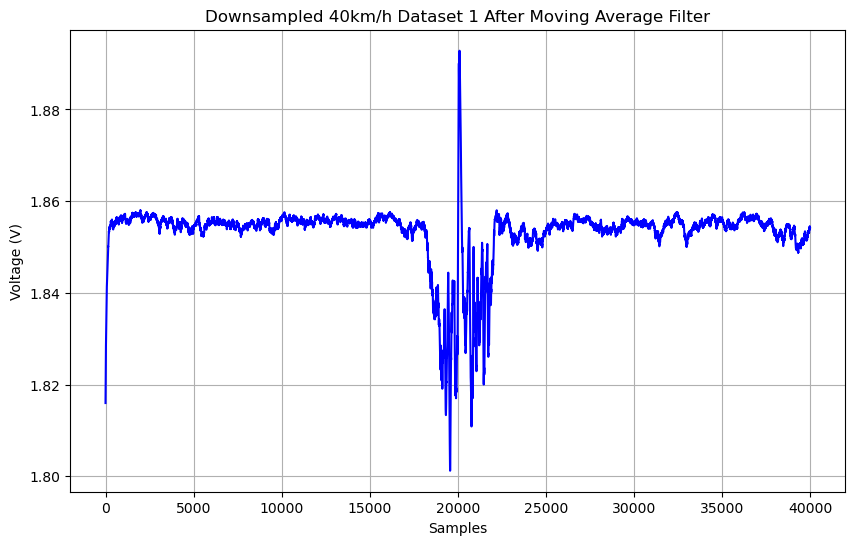

In [426]:
# Original data at 20 ks/s
original_data = filtered_data

# Downsampling factor (20 ks/s to 1 ks/s)
downsampling_factor = 5

# Calculate the length of the downsampled array
downsampled_length = len(original_data) // downsampling_factor

# Create an empty array for the downsampled data
downsampled_data = np.empty(downsampled_length)

# Perform downsampling by averaging
for i in range(downsampled_length):
    start_index = i * downsampling_factor
    end_index = start_index + downsampling_factor
    downsampled_data[i] = np.mean(original_data[start_index:end_index])


#downsampled_data = abs(downsampled_data - 2.5)
#downsampled_data = downsampled_data[0:1000]

# Now, downsampled_data contains the downsampled array at 1 ks/s
# Create the plot
plt.figure(figsize=(10, 6))  # Optional: Set the figure size
plt.plot(downsampled_data, color='b')
plt.xlabel('Samples')
plt.ylabel('Voltage (V)')
plt.title('Downsampled 40km/h Dataset 1 After Moving Average Filter')
plt.grid(True)

### Taking DFT of above plot

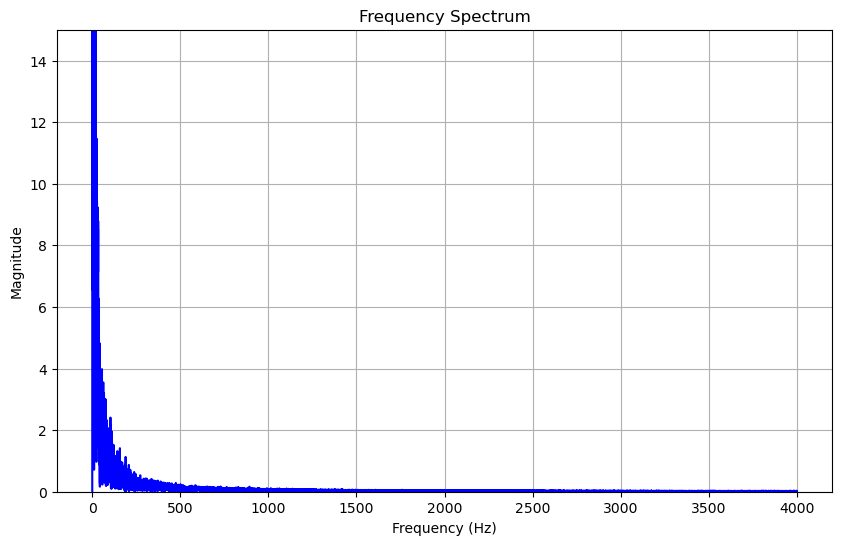

In [427]:
# Sampling frequency (inverse of the time step)
sampling_frequency = 8000

# Perform the FFT
fft_result = np.fft.fft(downsampled_data)
fft_freqs = np.fft.fftfreq(len(downsampled_data), 1 / sampling_frequency)

# Calculate the magnitude of the FFT result
fft_magnitude = np.abs(fft_result)
fft_magnitude[0] = 0
# Plot the frequency spectrum
plt.figure(figsize=(10, 6))  # Optional: Set the figure size
plt.plot(fft_freqs[:len(fft_freqs) // 2], fft_magnitude[:len(fft_magnitude) // 2], color='b')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.ylim(0,15)
#plt.xlim(0,1000)
plt.title('Frequency Spectrum')
plt.grid(True)

# Show the plot
plt.show()

### Applying the second method to all the data and plotting them side by side without downsampling

### 20km/h Frequency Plots

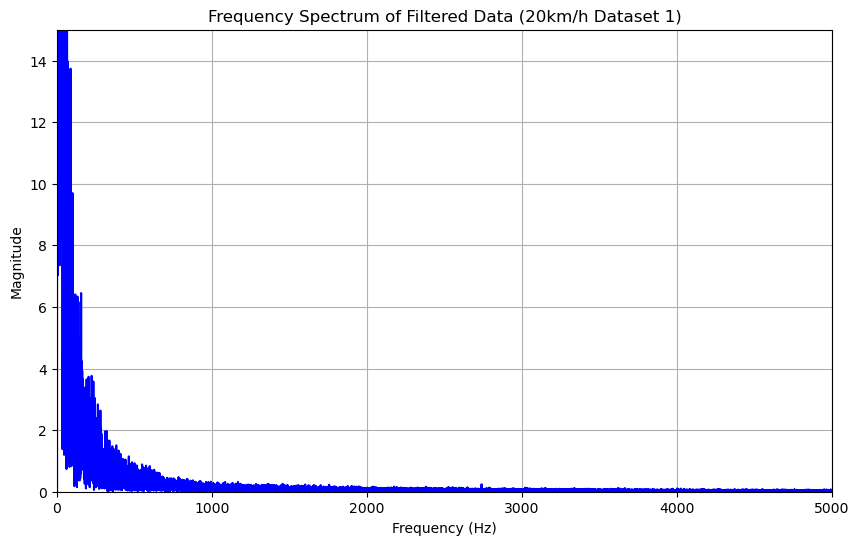

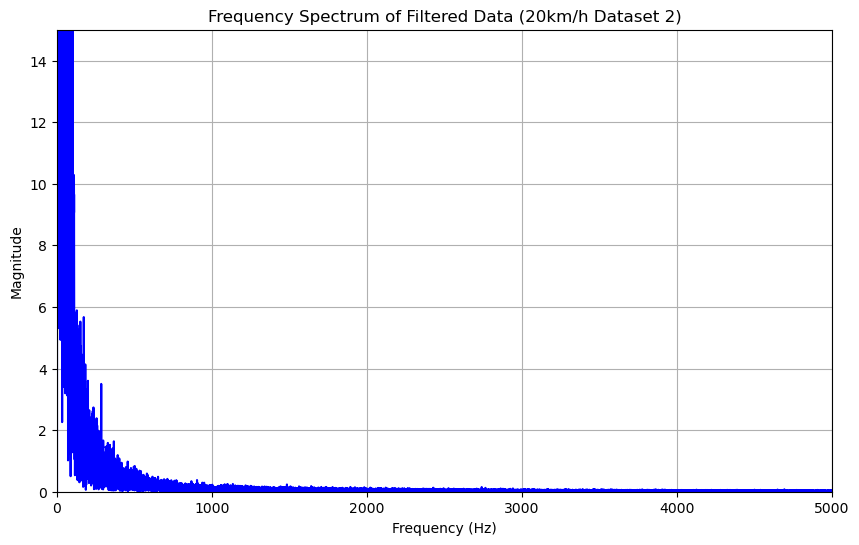

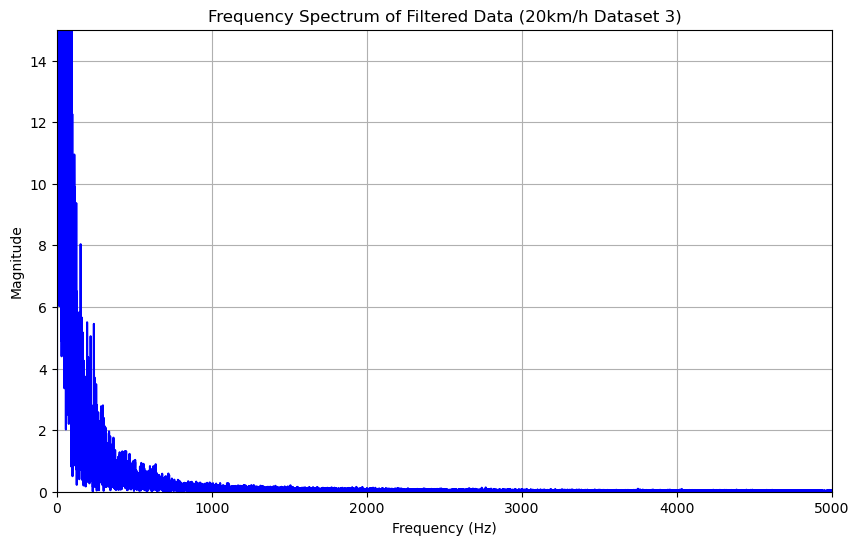

In [434]:
#READING IN THE DATA

# Initialize empty lists to store time and voltage data
time_data = []
voltage_data = []

# Read data from the text file
with open('40ksps/20km_h.txt', 'r') as file:
    next(file)  # Skip the header line
    next(file)
    for line in file:
        # Split each line into columns using whitespace as the delimiter
        columns = line.strip().split()
        if len(columns) == 2:
            time_data.append(float(columns[0]))
            voltage_data.append(float(columns[1]))

voltage_data = np.array(voltage_data) #converting voltage_data into a numpy array

#ISOLATING THE TARGET

for i in range(len(voltage_data)):
    if voltage_data[i] > 1.93:
        target = voltage_data[i-100000:100000+i]
        
        break
    
#FILTERING THE DATA

class LowpassFilter:
    def __init__(self, alpha):
        """
        Initialize the lowpass filter.

        Args:
        alpha (float): Smoothing factor (0 < alpha < 1). A smaller alpha gives stronger smoothing.
        """
        self.alpha = alpha
        self.filtered_value = None

    def update(self, new_value):
        """
        Update the filter with a new value.

        Args:
        new_value (float): New input value.

        Returns:
        float: Filtered output.
        """
        if self.filtered_value is None:
            self.filtered_value = new_value
        else:
            self.filtered_value = self.alpha * new_value + (1 - self.alpha) * self.filtered_value
        return self.filtered_value

# Example usage
alpha = 0.003  # Smoothing factor (adjust as needed, lower values provide stronger smoothing)
lowpass_filter = LowpassFilter(alpha)

# Apply the lowpass filter to the input data
filtered_data = [lowpass_filter.update(value) for value in target]
filtered_data = np.array(filtered_data)
# Now, filtered_data contains the filtered values.


# Sampling frequency (inverse of the time step)
sampling_frequency = 40000

# Perform the FFT
fft_result = np.fft.fft(filtered_data)
fft_freqs = np.fft.fftfreq(len(filtered_data), 1 / sampling_frequency)

# Calculate the magnitude of the FFT result
fft_magnitude = np.abs(fft_result)
fft_magnitude[0] = 0
# Plot the frequency spectrum
plt.figure(figsize=(10, 6))  # Optional: Set the figure size
plt.plot(fft_freqs[:len(fft_freqs) // 2], fft_magnitude[:len(fft_magnitude) // 2], color='b')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.ylim(0,15)
plt.xlim(0,5000)
plt.title('Frequency Spectrum of Filtered Data (20km/h Dataset 1)')
plt.grid(True)

# Show the plot
plt.show()

#READING IN THE DATA

# Initialize empty lists to store time and voltage data
time_data = []
voltage_data = []

# Read data from the text file
with open('40ksps/20km_h2.txt', 'r') as file:
    next(file)  # Skip the header line
    next(file)
    for line in file:
        # Split each line into columns using whitespace as the delimiter
        columns = line.strip().split()
        if len(columns) == 2:
            time_data.append(float(columns[0]))
            voltage_data.append(float(columns[1]))

voltage_data = np.array(voltage_data) #converting voltage_data into a numpy array

#ISOLATING THE TARGET

for i in range(len(voltage_data)):
    if voltage_data[i] > 1.93:
        target = voltage_data[i-100000:100000+i]
        
        break
    
#FILTERING THE DATA

class LowpassFilter:
    def __init__(self, alpha):
        """
        Initialize the lowpass filter.

        Args:
        alpha (float): Smoothing factor (0 < alpha < 1). A smaller alpha gives stronger smoothing.
        """
        self.alpha = alpha
        self.filtered_value = None

    def update(self, new_value):
        """
        Update the filter with a new value.

        Args:
        new_value (float): New input value.

        Returns:
        float: Filtered output.
        """
        if self.filtered_value is None:
            self.filtered_value = new_value
        else:
            self.filtered_value = self.alpha * new_value + (1 - self.alpha) * self.filtered_value
        return self.filtered_value

# Example usage
alpha = 0.003  # Smoothing factor (adjust as needed, lower values provide stronger smoothing)
lowpass_filter = LowpassFilter(alpha)

# Apply the lowpass filter to the input data
filtered_data = [lowpass_filter.update(value) for value in target]
filtered_data = np.array(filtered_data)
# Now, filtered_data contains the filtered values.


# Sampling frequency (inverse of the time step)
sampling_frequency = 40000

# Perform the FFT
fft_result = np.fft.fft(filtered_data)
fft_freqs = np.fft.fftfreq(len(filtered_data), 1 / sampling_frequency)

# Calculate the magnitude of the FFT result
fft_magnitude = np.abs(fft_result)
fft_magnitude[0] = 0
# Plot the frequency spectrum
plt.figure(figsize=(10, 6))  # Optional: Set the figure size
plt.plot(fft_freqs[:len(fft_freqs) // 2], fft_magnitude[:len(fft_magnitude) // 2], color='b')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.ylim(0,15)
plt.xlim(0,5000)
plt.title('Frequency Spectrum of Filtered Data (20km/h Dataset 2)')
plt.grid(True)

# Show the plot
plt.show()

#READING IN THE DATA

# Initialize empty lists to store time and voltage data
time_data = []
voltage_data = []

# Read data from the text file
with open('40ksps/20km_h3.txt', 'r') as file:
    next(file)  # Skip the header line
    next(file)
    for line in file:
        # Split each line into columns using whitespace as the delimiter
        columns = line.strip().split()
        if len(columns) == 2:
            time_data.append(float(columns[0]))
            voltage_data.append(float(columns[1]))

voltage_data = np.array(voltage_data) #converting voltage_data into a numpy array

#ISOLATING THE TARGET

for i in range(len(voltage_data)):
    if voltage_data[i] > 1.93:
        target = voltage_data[i-100000:100000+i]
        
        break
    
#FILTERING THE DATA

class LowpassFilter:
    def __init__(self, alpha):
        """
        Initialize the lowpass filter.

        Args:
        alpha (float): Smoothing factor (0 < alpha < 1). A smaller alpha gives stronger smoothing.
        """
        self.alpha = alpha
        self.filtered_value = None

    def update(self, new_value):
        """
        Update the filter with a new value.

        Args:
        new_value (float): New input value.

        Returns:
        float: Filtered output.
        """
        if self.filtered_value is None:
            self.filtered_value = new_value
        else:
            self.filtered_value = self.alpha * new_value + (1 - self.alpha) * self.filtered_value
        return self.filtered_value

# Example usage
alpha = 0.003  # Smoothing factor (adjust as needed, lower values provide stronger smoothing)
lowpass_filter = LowpassFilter(alpha)

# Apply the lowpass filter to the input data
filtered_data = [lowpass_filter.update(value) for value in target]
filtered_data = np.array(filtered_data)
# Now, filtered_data contains the filtered values.


# Sampling frequency (inverse of the time step)
sampling_frequency = 40000

# Perform the FFT
fft_result = np.fft.fft(filtered_data)
fft_freqs = np.fft.fftfreq(len(filtered_data), 1 / sampling_frequency)

# Calculate the magnitude of the FFT result
fft_magnitude = np.abs(fft_result)
fft_magnitude[0] = 0
# Plot the frequency spectrum
plt.figure(figsize=(10, 6))  # Optional: Set the figure size
plt.plot(fft_freqs[:len(fft_freqs) // 2], fft_magnitude[:len(fft_magnitude) // 2], color='b')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.ylim(0,15)
plt.xlim(0,5000)
plt.title('Frequency Spectrum of Filtered Data (20km/h Dataset 3)')
plt.grid(True)

# Show the plot
plt.show()


### 40km/h Frequency Plots

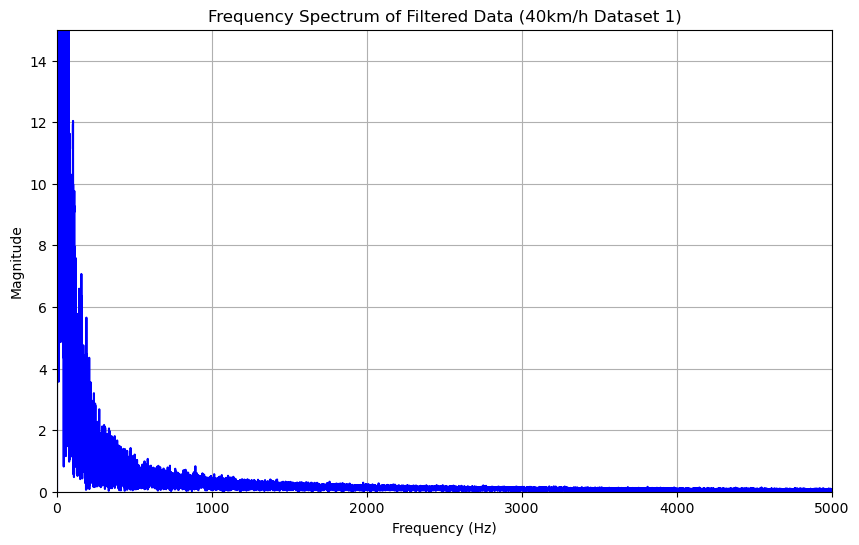

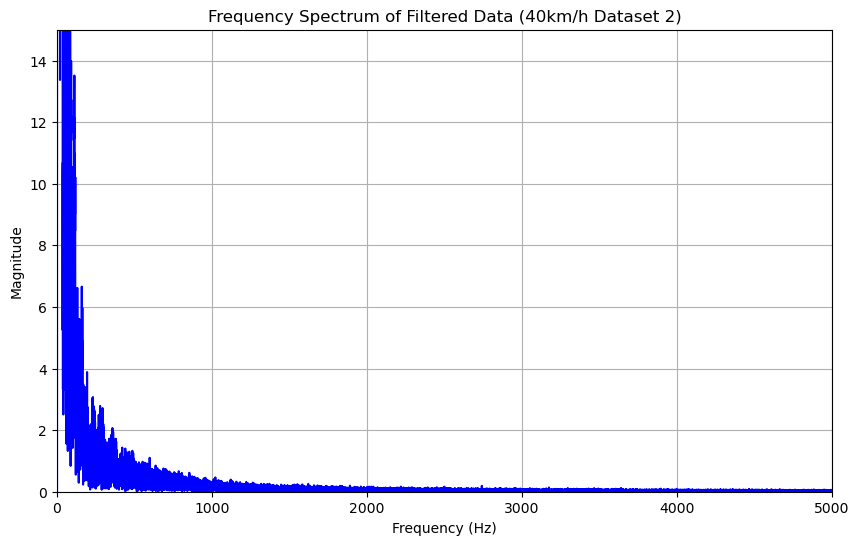

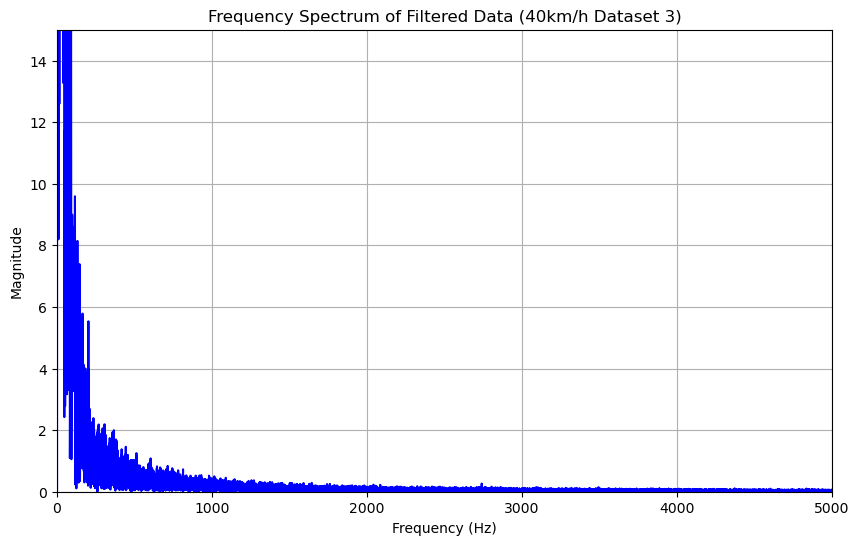

In [433]:
#READING IN THE DATA

# Initialize empty lists to store time and voltage data
time_data = []
voltage_data = []

# Read data from the text file
with open('40ksps/40km_h.txt', 'r') as file:
    next(file)  # Skip the header line
    next(file)
    for line in file:
        # Split each line into columns using whitespace as the delimiter
        columns = line.strip().split()
        if len(columns) == 2:
            time_data.append(float(columns[0]))
            voltage_data.append(float(columns[1]))

voltage_data = np.array(voltage_data) #converting voltage_data into a numpy array

#ISOLATING THE TARGET

for i in range(len(voltage_data)):
    if voltage_data[i] > 1.93:
        target = voltage_data[i-100000:100000+i]
        
        break
    
#FILTERING THE DATA

class LowpassFilter:
    def __init__(self, alpha):
        """
        Initialize the lowpass filter.

        Args:
        alpha (float): Smoothing factor (0 < alpha < 1). A smaller alpha gives stronger smoothing.
        """
        self.alpha = alpha
        self.filtered_value = None

    def update(self, new_value):
        """
        Update the filter with a new value.

        Args:
        new_value (float): New input value.

        Returns:
        float: Filtered output.
        """
        if self.filtered_value is None:
            self.filtered_value = new_value
        else:
            self.filtered_value = self.alpha * new_value + (1 - self.alpha) * self.filtered_value
        return self.filtered_value

# Example usage
alpha = 0.003  # Smoothing factor (adjust as needed, lower values provide stronger smoothing)
lowpass_filter = LowpassFilter(alpha)

# Apply the lowpass filter to the input data
filtered_data = [lowpass_filter.update(value) for value in target]
filtered_data = np.array(filtered_data)
# Now, filtered_data contains the filtered values.


# Sampling frequency (inverse of the time step)
sampling_frequency = 40000

# Perform the FFT
fft_result = np.fft.fft(filtered_data)
fft_freqs = np.fft.fftfreq(len(filtered_data), 1 / sampling_frequency)

# Calculate the magnitude of the FFT result
fft_magnitude = np.abs(fft_result)
fft_magnitude[0] = 0
# Plot the frequency spectrum
plt.figure(figsize=(10, 6))  # Optional: Set the figure size
plt.plot(fft_freqs[:len(fft_freqs) // 2], fft_magnitude[:len(fft_magnitude) // 2], color='b')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.ylim(0,15)
plt.xlim(0,5000)
plt.title('Frequency Spectrum of Filtered Data (40km/h Dataset 1)')
plt.grid(True)

# Show the plot
plt.show()

#READING IN THE DATA

# Initialize empty lists to store time and voltage data
time_data = []
voltage_data = []

# Read data from the text file
with open('40ksps/40km_h2.txt', 'r') as file:
    next(file)  # Skip the header line
    next(file)
    for line in file:
        # Split each line into columns using whitespace as the delimiter
        columns = line.strip().split()
        if len(columns) == 2:
            time_data.append(float(columns[0]))
            voltage_data.append(float(columns[1]))

voltage_data = np.array(voltage_data) #converting voltage_data into a numpy array

#ISOLATING THE TARGET

for i in range(len(voltage_data)):
    if voltage_data[i] > 1.93:
        target = voltage_data[i-100000:100000+i]
        
        break
    
#FILTERING THE DATA

class LowpassFilter:
    def __init__(self, alpha):
        """
        Initialize the lowpass filter.

        Args:
        alpha (float): Smoothing factor (0 < alpha < 1). A smaller alpha gives stronger smoothing.
        """
        self.alpha = alpha
        self.filtered_value = None

    def update(self, new_value):
        """
        Update the filter with a new value.

        Args:
        new_value (float): New input value.

        Returns:
        float: Filtered output.
        """
        if self.filtered_value is None:
            self.filtered_value = new_value
        else:
            self.filtered_value = self.alpha * new_value + (1 - self.alpha) * self.filtered_value
        return self.filtered_value

# Example usage
alpha = 0.003  # Smoothing factor (adjust as needed, lower values provide stronger smoothing)
lowpass_filter = LowpassFilter(alpha)

# Apply the lowpass filter to the input data
filtered_data = [lowpass_filter.update(value) for value in target]
filtered_data = np.array(filtered_data)
# Now, filtered_data contains the filtered values.


# Sampling frequency (inverse of the time step)
sampling_frequency = 40000

# Perform the FFT
fft_result = np.fft.fft(filtered_data)
fft_freqs = np.fft.fftfreq(len(filtered_data), 1 / sampling_frequency)

# Calculate the magnitude of the FFT result
fft_magnitude = np.abs(fft_result)
fft_magnitude[0] = 0
# Plot the frequency spectrum
plt.figure(figsize=(10, 6))  # Optional: Set the figure size
plt.plot(fft_freqs[:len(fft_freqs) // 2], fft_magnitude[:len(fft_magnitude) // 2], color='b')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.ylim(0,15)
plt.xlim(0,5000)
plt.title('Frequency Spectrum of Filtered Data (40km/h Dataset 2)')
plt.grid(True)

# Show the plot
plt.show()

#READING IN THE DATA

# Initialize empty lists to store time and voltage data
time_data = []
voltage_data = []

# Read data from the text file
with open('40ksps/40km_h3.txt', 'r') as file:
    next(file)  # Skip the header line
    next(file)
    for line in file:
        # Split each line into columns using whitespace as the delimiter
        columns = line.strip().split()
        if len(columns) == 2:
            time_data.append(float(columns[0]))
            voltage_data.append(float(columns[1]))

voltage_data = np.array(voltage_data) #converting voltage_data into a numpy array

#ISOLATING THE TARGET

for i in range(len(voltage_data)):
    if voltage_data[i] > 1.93:
        target = voltage_data[i-100000:100000+i]
        
        break
    
#FILTERING THE DATA

class LowpassFilter:
    def __init__(self, alpha):
        """
        Initialize the lowpass filter.

        Args:
        alpha (float): Smoothing factor (0 < alpha < 1). A smaller alpha gives stronger smoothing.
        """
        self.alpha = alpha
        self.filtered_value = None

    def update(self, new_value):
        """
        Update the filter with a new value.

        Args:
        new_value (float): New input value.

        Returns:
        float: Filtered output.
        """
        if self.filtered_value is None:
            self.filtered_value = new_value
        else:
            self.filtered_value = self.alpha * new_value + (1 - self.alpha) * self.filtered_value
        return self.filtered_value

# Example usage
alpha = 0.003  # Smoothing factor (adjust as needed, lower values provide stronger smoothing)
lowpass_filter = LowpassFilter(alpha)

# Apply the lowpass filter to the input data
filtered_data = [lowpass_filter.update(value) for value in target]
filtered_data = np.array(filtered_data)
# Now, filtered_data contains the filtered values.


# Sampling frequency (inverse of the time step)
sampling_frequency = 40000

# Perform the FFT
fft_result = np.fft.fft(filtered_data)
fft_freqs = np.fft.fftfreq(len(filtered_data), 1 / sampling_frequency)

# Calculate the magnitude of the FFT result
fft_magnitude = np.abs(fft_result)
fft_magnitude[0] = 0
# Plot the frequency spectrum
plt.figure(figsize=(10, 6))  # Optional: Set the figure size
plt.plot(fft_freqs[:len(fft_freqs) // 2], fft_magnitude[:len(fft_magnitude) // 2], color='b')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.ylim(0,15)
plt.xlim(0,5000)
plt.title('Frequency Spectrum of Filtered Data (40km/h Dataset 3)')
plt.grid(True)

# Show the plot
plt.show()
